# 3차 프로젝트
---

> * 목적: AI 스피커 제품 출시 전 상대제품 리뷰 분석 후 개선점 예측 모델
>
> * 데이터셋: Alexa 리뷰 데이터 분석 [바로가기](https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews/data)


## 라이브러리 선언

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 로드

In [3]:
df = pd.read_csv('data/amazon_alexa.tsv', sep='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


## 결측치 확인 및 처리

In [6]:
empty_review = df['verified_reviews'].replace(' ', '') == ''
null_review = df['verified_reviews'].isnull()

df[empty_review | null_review].info()
df[empty_review | null_review]


<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 85 to 3141
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            80 non-null     int64 
 1   date              80 non-null     object
 2   variation         80 non-null     object
 3   verified_reviews  79 non-null     object
 4   feedback          80 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 3.8+ KB


,rating,date,variation,verified_reviews,feedback
85,5,30-Jul-18,Heather Gray Fabric,,1
183,3,29-Jul-18,Heather Gray Fabric,,1
219,5,29-Jul-18,Sandstone Fabric,,1
374,1,26-Jul-18,Black,,0
406,1,16-Jul-18,White,,0
...,...,...,...,...,...
3114,3,30-Jul-18,Black Dot,,1
3120,5,30-Jul-18,Black Dot,,1
3123,4,30-Jul-18,Black Dot,,1
3126,5,30-Jul-18,Black Dot,,1


### null 값 또는 빈 문자열 리뷰 제거

In [7]:
cleaned_df = df.drop(df[empty_review | null_review].index)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3070 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3070 non-null   int64 
 1   date              3070 non-null   object
 2   variation         3070 non-null   object
 3   verified_reviews  3070 non-null   object
 4   feedback          3070 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 143.9+ KB


## rating 분석 및 시각화

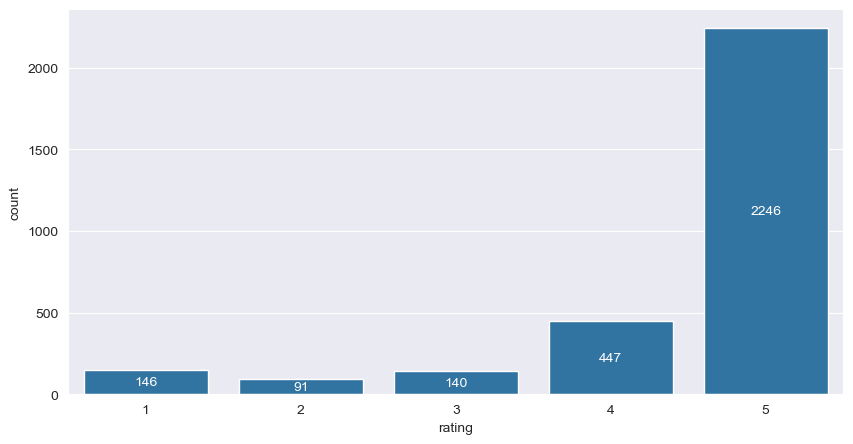

In [8]:
cleaned_df.groupby('rating')['rating'].count()

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=cleaned_df, x='rating')

# 각 막대 위에 수치를 표시
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
         (p.get_x() + p.get_width() / 2, p.get_height() / 2),
        ha='center',
        va='center',
        color='white'
        )

plt.show()

## 테스트\#1

### SVM, Logistic Regression, Random Forest, KNN

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# 1. 리뷰 데이터와 별점 분리
X = cleaned_df['verified_reviews']
y = cleaned_df['rating']

# 2. TF-IDF 벡터화 (텍스트 -> 숫자 변환)
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(X)

# 3. 학습 데이터와 테스트 데이터 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


# 4. 각 모델 학습 및 예측
models = {
    'SVM': SVC(kernel='linear'),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
}

# 5. 모델별 성능 평가
accuracy_results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy

# 6. 모델별 정확도 출력
for model_name, accuracy in accuracy_results.items():
    print(f"{model_name}: {accuracy * 100:.2f}%")


# Null, 공백 리뷰 제거 결과
# SVM: 78.83%
# Logistic Regression: 76.55%
# Random Forest: 83.71%
# KNN: 70.52%

SVM: 78.83%
Logistic Regression: 76.55%
Random Forest: 83.39%
KNN: 70.85%


### XGBoost

In [10]:
!pip install xgboost

In [11]:
import xgboost as xgb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. 리뷰 데이터와 라벨 분리
X = cleaned_df['verified_reviews']
y = cleaned_df['rating'] -1  # 1부터 시작하는 라벨을 0부터 시작하는 라벨로 변환

# 2. TF-IDF 벡터화
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(X)

# 3. 학습 데이터와 테스트 데이터 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 4. XGBoost 모델 학습
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# 5. 테스트 데이터로 예측
y_pred_xgb = xgb_model.predict(X_test)

# 6. 성능 평가
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")


/Users/jhjoo/miniconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [09:42:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 82.08%


### Bert
> Run time: Over then 2 hours...
>
> Do not running this part in Colab!

In [12]:
# !pip install datasets
# !pip install transformers
# !pip install torch
# !pip install accelerate
# !pip install scikit-learn

In [13]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset

# 1. 리뷰 데이터와 라벨 분리
X = cleaned_df['verified_reviews']
y = cleaned_df['rating'] -1 # 1부터 시작하는 라벨을 0부터 시작하는 라벨로 변환

# 2. BERT Tokenizer 준비
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# 3. 데이터 토큰화 함수 정의
def tokenize_function(examples):
    return tokenizer(examples['review'], padding='max_length', truncation=True, max_length=128)

# 4. 데이터셋 준비 (학습 및 테스트 분리)
train_texts, test_texts, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)
train_dataset = Dataset.from_dict({'review': train_texts, 'label': train_labels})
test_dataset = Dataset.from_dict({'review': test_texts, 'label': test_labels})

# 토큰화 적용
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# 5. BERT 모델 준비
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=5)

# 6. 학습 설정
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=2,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch"
)

# 7. 트레이너 정의
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# 8. 모델 학습
trainer.train()

# 9. 성능 평가
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=-1)
accuracy_bert = (preds == test_labels).mean()
print(f"BERT Accuracy: {accuracy_bert * 100:.2f}%")


Map:   0%|          | 0/2456 [00:00<?, ? examples/s]

Map:   0%|          | 0/614 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/jhjoo/miniconda3/lib/python3.12/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.920900,0.599102
2,0.442400,0.555154


BERT Accuracy: 79.97%


## 테스트\#2

### 이모지 제거 및 소문자로 정리 후 성능 확인

In [18]:
import re

# 이모지 제거를 위한 함수 정의
def remove_emoji(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # 이모지 범위: emoticons
        u"\U0001F300-\U0001F5FF"  # 심볼 & 픽토그램
        u"\U0001F680-\U0001F6FF"  # 운송 및 지도 기호
        u"\U0001F700-\U0001F77F"  # 알케미 기호
        u"\U0001F780-\U0001F7FF"  # 추가 심볼
        u"\U0001F800-\U0001F8FF"  # 추가 픽토그램
        u"\U0001F900-\U0001F9FF"  # 추가 손모양 & 신체 부위
        u"\U0001FA00-\U0001FA6F"  # 추가 객체
        u"\U0001FA70-\U0001FAFF"  # 추가 기호
        u"\U00002702-\U000027B0"  # 다양한 심볼
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# 특수문자 제거를 위한 함수 정의
def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)  # 알파벳, 숫자, 공백을 제외한 모든 문자 제거


In [19]:
# 소문자로 변환
cleaned_df['verified_reviews'] = cleaned_df['verified_reviews'].str.lower()

In [20]:
# 이모지와 특수문자 제거
cleaned_df['verified_reviews'] = cleaned_df['verified_reviews'].apply(remove_emoji)  # 이모지 제거
cleaned_df['verified_reviews'] = cleaned_df['verified_reviews'].apply(remove_special_characters)  # 특수문자 제거

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# 1. 리뷰 데이터와 별점 분리
X = cleaned_df['verified_reviews']
y = cleaned_df['rating']

# 2. TF-IDF 벡터화 (텍스트 -> 숫자 변환)
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(X)

# 3. 학습 데이터와 테스트 데이터 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


# 4. 각 모델 학습 및 예측
models = {
    'SVM': SVC(kernel='linear'),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
}

# 5. 모델별 성능 평가
accuracy_results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[model_name] = accuracy

# 6. 모델별 정확도 출력
for model_name, accuracy in accuracy_results.items():
    print(f"{model_name}: {accuracy * 100:.2f}%")


# 이모지 및 특수문자 제거, 전체 소문자로 변경 결과
# SVM: 77.85%
# Logistic Regression: 76.71%
# Random Forest: 84.04%
# KNN: 70.03%

SVM: 77.85%
Logistic Regression: 76.71%
Random Forest: 83.55%
KNN: 71.66%
